In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint
import os
import matplotlib.pyplot as plt

In [559]:
path_to_test_csv_out = '/Users/danielfisher/Projects/kcl-globalgasflaring/data/processed/merged_months/ats/2011'
df_files = os.listdir(path_to_test_csv_out)
df_list = [pd.read_csv(os.path.join(path_to_test_csv_out, f)) for f in df_files]

In [560]:
year_df = pd.concat(df_list, ignore_index=True)
year_df.shape

(1771518, 6)

In [561]:
coords = year_df.as_matrix(columns=['lats', 'lons'])

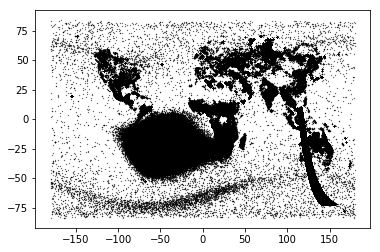

In [562]:
plt.plot(coords[:,1], coords[:,0], 'ko', markersize = 0.25)
plt.show()

In [563]:
lat_lon_tuples = zip(year_df.lats, year_df.lons)

In [564]:
unique_locations, indicies, unique_counts = np.unique(lat_lon_tuples, axis=0, return_inverse=True, return_counts=True)

In [565]:
year_df['clusters'] = indicies
year_df['cluster_counts'] = unique_counts[indicies]

In [566]:
year_df = year_df[year_df['cluster_counts'] >= 4]

In [567]:
grouped_df = year_df.groupby('clusters').agg({'frp': np.mean, 'lats': np.mean, 'lons': np.mean})

In [568]:
grouped_df.shape

(7814, 3)

In [569]:
sub_coords = grouped_df.as_matrix(columns=['lats', 'lons'])

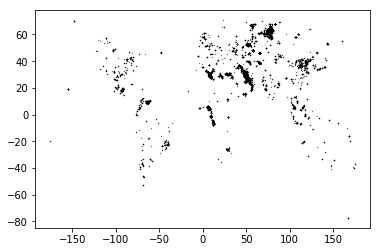

In [570]:
plt.plot(sub_coords[:,1], sub_coords[:,0], 'ko', markersize=0.25)
plt.show()